In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import mutual_info_classif,f_regression
from sklearn.feature_selection import SelectKBest

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#load data
iowa_file_path = '../data/Housing Prices Competition/train.csv'

df = pd.read_csv(iowa_file_path)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Data Visualisation

In [4]:
def plot_boxplot(df, column_name):
    """
    Plots a box plot for a specific column in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to plot.

    Returns:
    None
    """
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(column_name)
    plt.grid(True)
    plt.show()

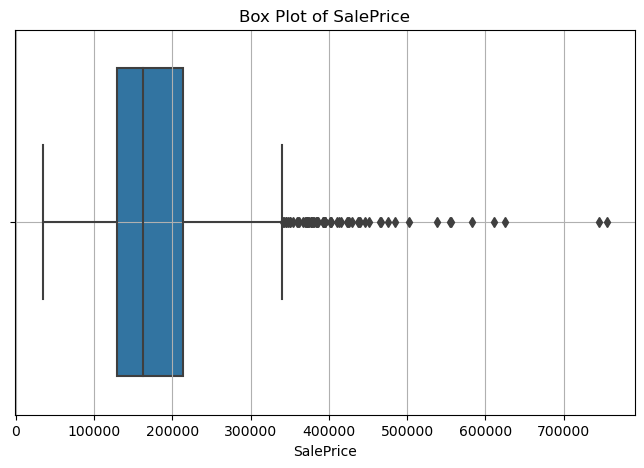

In [5]:
#checking for negatives and outliers
plot_boxplot(df,'SalePrice')

In [6]:
def plot_dataframe_columns(df):
    """
    Plots each numerical column in the DataFrame as a separate line on the same plot.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    None
    """
    numeric_df = df.select_dtypes(include='number')
    
    if numeric_df.empty:
        print("No numeric columns to plot.")
        return

    numeric_df.plot(figsize=(10, 6))
    plt.title('Line Plot of DataFrame Columns')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Data Cleaning

In [7]:
# checking to see how many null values we have in each of the other columns
columns_with_nulls = []
for column in df.columns:
    if df.loc[:, column].isnull().any():
        columns_with_nulls.append(column)

for column in columns_with_nulls:
    percent_missing = round(((df.loc[df.loc[:, column].isnull()].shape[0] / df.shape[0]) * 100), 4)
    print("Column {} has {}% missing values \n".format(column, percent_missing))

Column LotFrontage has 17.7397% missing values 

Column Alley has 93.7671% missing values 

Column MasVnrType has 0.5479% missing values 

Column MasVnrArea has 0.5479% missing values 

Column BsmtQual has 2.5342% missing values 

Column BsmtCond has 2.5342% missing values 

Column BsmtExposure has 2.6027% missing values 

Column BsmtFinType1 has 2.5342% missing values 

Column BsmtFinType2 has 2.6027% missing values 

Column Electrical has 0.0685% missing values 

Column FireplaceQu has 47.2603% missing values 

Column GarageType has 5.5479% missing values 

Column GarageYrBlt has 5.5479% missing values 

Column GarageFinish has 5.5479% missing values 

Column GarageQual has 5.5479% missing values 

Column GarageCond has 5.5479% missing values 

Column PoolQC has 99.5205% missing values 

Column Fence has 80.7534% missing values 

Column MiscFeature has 96.3014% missing values 



In [8]:
# for columns with only a very small amoung of null values, we will simply drop the nulls that are there.
columns_with_few_nulls = ['MasVnrType',
                          'BsmtQual',
                          'BsmtCond',
                          'BsmtExposure',
                          'BsmtFinType1',
                         'BsmtFinType2',
                         'Electrical',
                         'GarageType',
                         'GarageYrBlt',
                         'GarageFinish',
                         'GarageQual',
                         'GarageCond']

for column in columns_with_few_nulls:
    df = df.loc[~df.loc[:, column].isnull()]

In [9]:
# updating our "columns_with_nulls" list
columns_with_nulls = []
for column in df.columns:
    if df.loc[:, column].isnull().any():  #if any column has null values drop it
        columns_with_nulls.append(column)

df = df.drop(columns=columns_with_nulls,axis=1)

In [10]:
#drop all columns with price < 0
df = df[df.SalePrice > 0]

In [11]:
# #remove outliers with z_score

# check_columns = [name for name in df.columns if df[name].dtype in ['int64', 'float64']]

# for cols in check_columns:
#     z = np.abs(stats.zscore(df[cols]))  #calculate z_score
#     threshold_z = 3
#     outlier_indices = np.where(z > threshold_z)[0]
#     no_outliers = df.drop(outlier_indices,axis=0,errors='ignore')  #drop on the rows

In [12]:
# #Remove outliers

cols_list = [name for name in df.columns if df[name].dtype in ['int64', 'float64']]

for cols in cols_list:
    #upper
    df[cols] = df[cols].clip(upper=df[cols].quantile(.90),lower=df[cols].quantile(.10))

#### Feature Engineering

##### Category Features

In [13]:
cat_feat = df.select_dtypes(include=[object])  #select category features

In [14]:
enc = OrdinalEncoder()
enc.fit_transform(cat_feat)

#calculate feature importance
cat_corr_df = pd.DataFrame()  #create new df to calculate correlations
cat_corr_df[cat_feat.columns] = enc.fit_transform(cat_feat)

cat_corr_df['SalePrice'] = df['SalePrice']
importance = np.abs(cat_corr_df.corr()['SalePrice']).sort_values(ascending = False)


# imp_features = importance[importance>0.5].index.drop('SalePrice')
imp_features = importance.drop('SalePrice')[:15].index

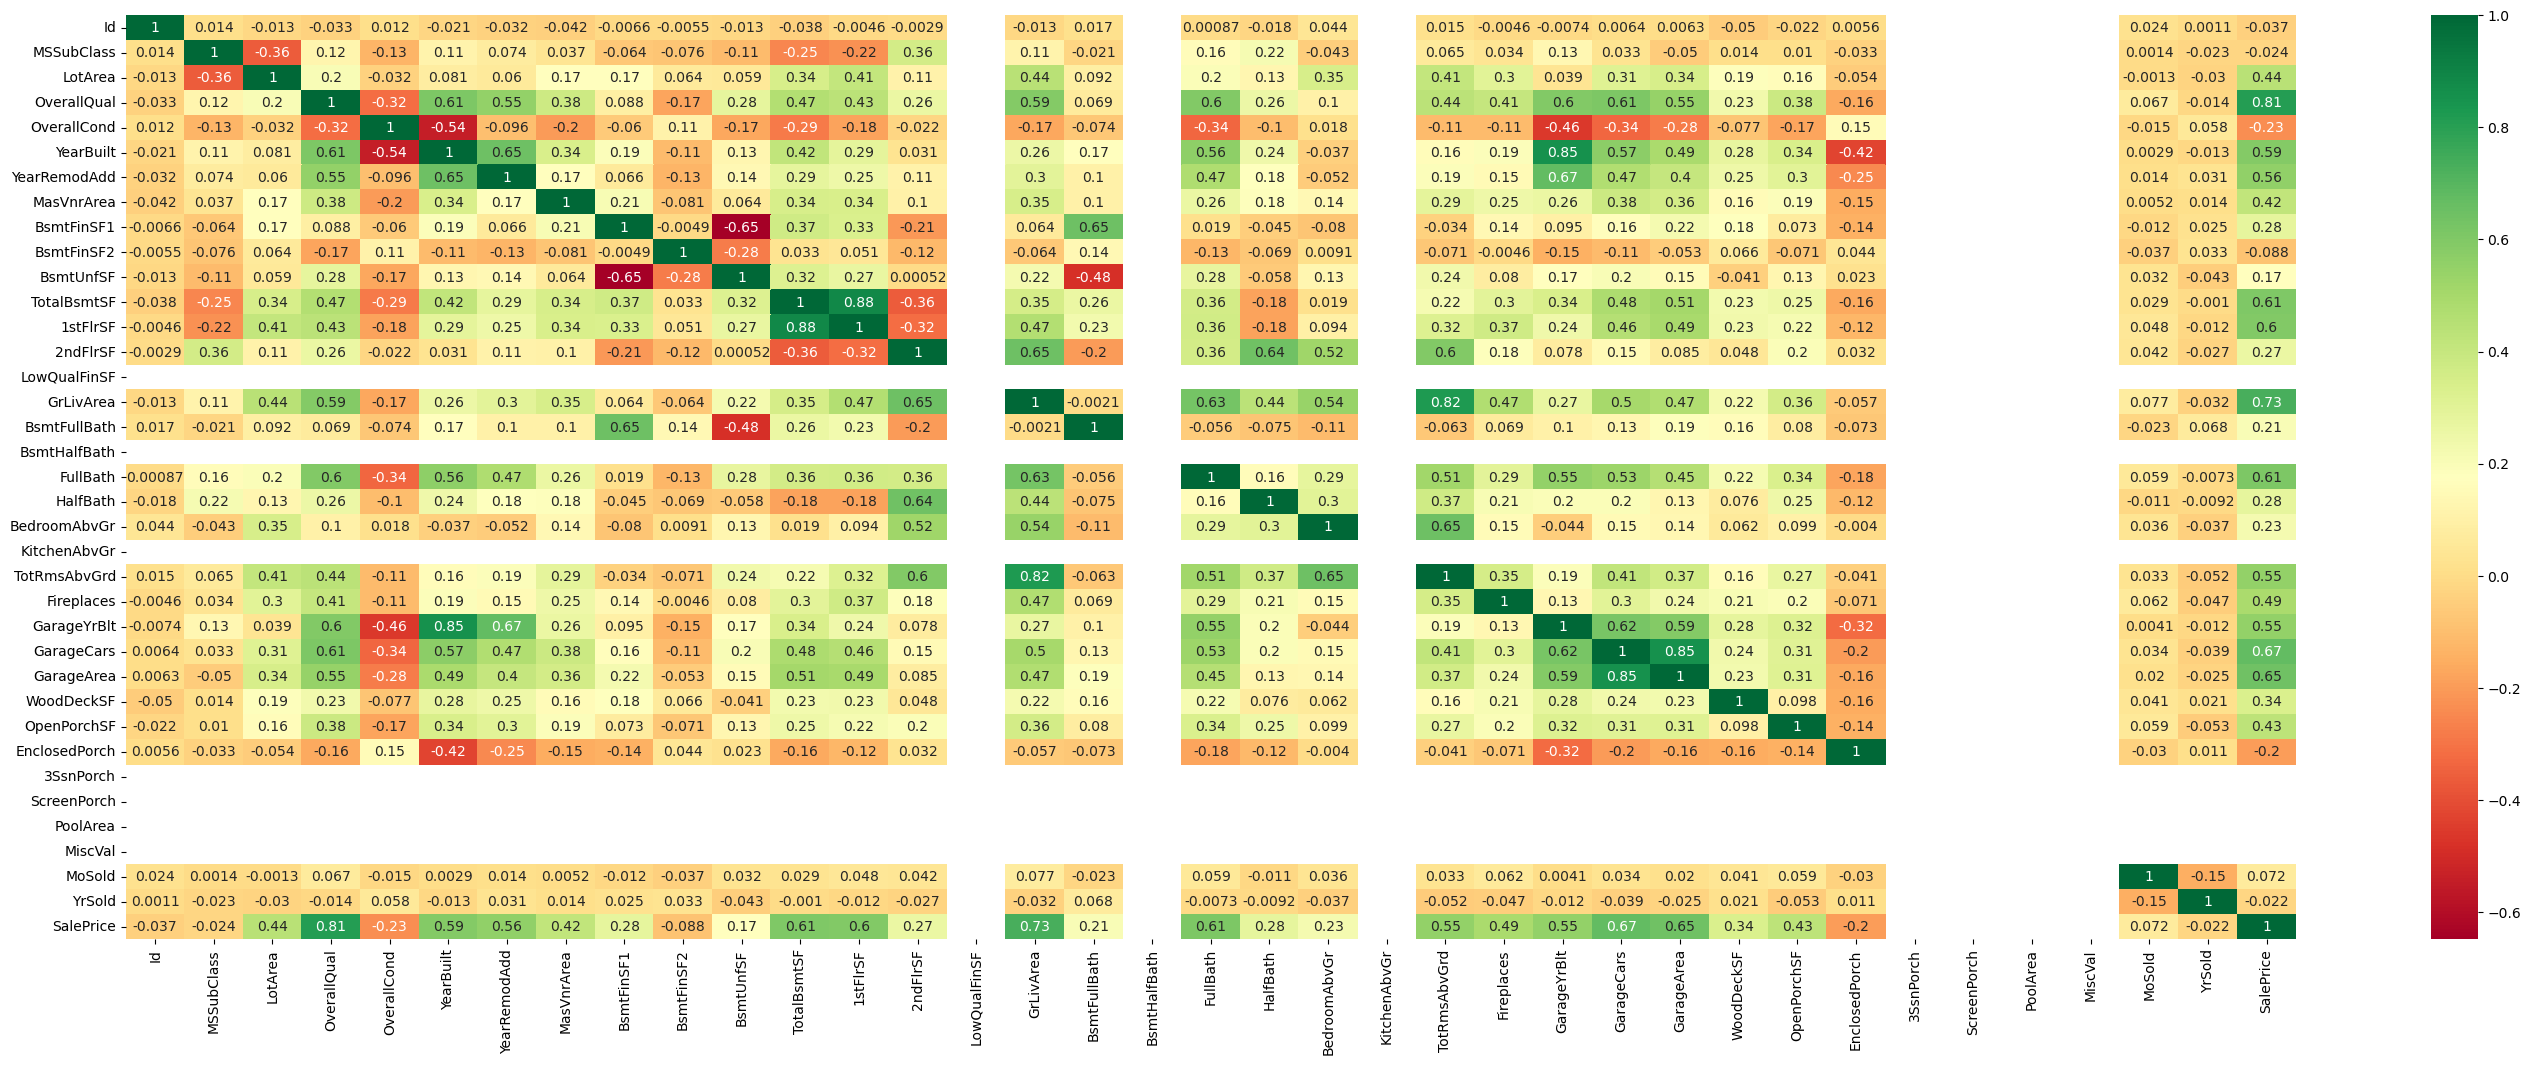

In [15]:
#check for corr.
num_cols = [name for name in df.columns if df[name].dtype in ['int64', 'float64']]

corrmat = df[num_cols].corr()   #get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(35,12))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
high_corr = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF' ]
likely_corr = ['GarageArea', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd', 'BsmtFinSF1', '2ndFlrSF']

#### Model Development

In [17]:
y = df.SalePrice
X = df.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

numerical_cols = high_corr + likely_corr
categorical_cols = imp_features.to_list()

# Select categorical columns with relatively low cardinality
categorical_cols = [name for name in categorical_cols if df[name].nunique() < 3 and df[name].dtype == "object"]

my_cols = categorical_cols + numerical_cols

X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

##### Preprocessing

In [18]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = 6))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

#### Linear Regression

In [19]:
lr_model =  LinearRegression()

lr_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', lr_model)
                             ])

lr_pipe.fit(X_train,y_train)

# Preprocessing of test data, get predictions
preds = lr_pipe.predict(X_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('MAE for Linear Regression', score)

MAE for Linear Regression 15465.415176062585


#### Random Forest

In [20]:
rf_model = RandomForestRegressor(n_estimators=500,max_depth=5, random_state=42)


rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)
                             ])


# Preprocessing of training data, fit model 
rf_pipe.fit(X_train, y_train)

# Preprocessing of test data, get predictions
preds = rf_pipe.predict(X_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('MAE for Random Forest', score)

MAE for Random Forest 15481.637836007494


#### Cross Validate

In [21]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(rf_pipe, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')


print("MAE scores for the Random Forest", scores)

MAE scores for the Random Forest [17107.8905769  15228.53769036 15332.71243042 15024.35790668
 16605.1439669 ]


In [22]:
print('Mean score for the Random Forest Model : {}'.format(scores.mean()))

Mean score for the Random Forest Model : 15859.728514252682


#### Cross Validate with Grid Search

In [23]:
parameters = {'n_estimators':[150,300,500],'max_depth':[3,4,5]}  #define parameter space

clf = make_pipeline(preprocessor, 
                    GridSearchCV(RandomForestRegressor(random_state=42),
                                 param_grid=parameters,
                                 cv=2,
                                 refit=True))

clf.fit(X_train,y_train)
clf[1].best_params_

{'max_depth': 5, 'n_estimators': 500}

In [24]:
clf[1].cv_results_

{'mean_fit_time': array([0.14941001, 0.29563534, 0.4804529 , 0.16438138, 0.32457483,
        0.54210544, 0.18332589, 0.36457753, 0.60453844]),
 'std_fit_time': array([0.00055075, 0.00192845, 0.00152576, 0.00025952, 0.00091994,
        0.00236368, 0.00087011, 0.00021458, 0.00118756]),
 'mean_score_time': array([0.00817013, 0.01556504, 0.02521694, 0.00881898, 0.01673245,
        0.02784348, 0.00893807, 0.01773155, 0.02935708]),
 'std_score_time': array([3.09705734e-04, 5.80549240e-05, 1.87039375e-04, 3.80873680e-04,
        2.64406204e-04, 3.38554382e-04, 3.09944153e-05, 3.49640846e-04,
        2.72154808e-04]),
 'param_max_depth': masked_array(data=[3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[150, 300, 500, 150, 300, 500, 150, 300, 500],
              mask=[False, False, False, False, False, False, False, Fa